In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

plt.rcParams["figure.figsize"] = (16,9)

In [98]:
df = pd.read_csv('housing.csv')
columns = df.columns.to_list()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Part 1: Exploratory Data Analysis

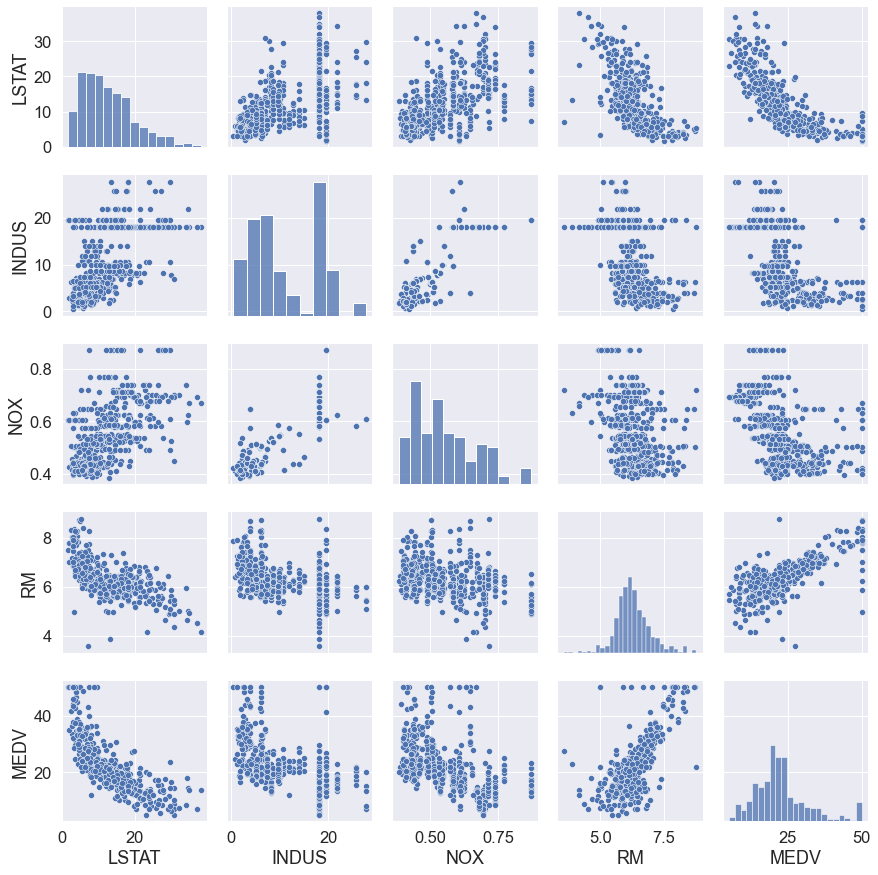

In [99]:
cols = ['LSTAT','INDUS','NOX', 'RM', 'MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

### Data set size and statistic value

In [100]:
print("Number of Columns :", len(df.columns))
print("Number of Rows :", len(df))

Number of Columns : 14
Number of Rows : 506


### Attributes datatype


In [101]:
def get_data_type(x):
    return type(x).__name__

result = df.applymap(get_data_type)

counts = result.apply(pd.value_counts)
counts.fillna(0,inplace=True)
df_melted = df.melt(var_name='columns', value_name='values')

counts = counts.T
counts

,float,int
CRIM,506.0,0.0
ZN,506.0,0.0
INDUS,506.0,0.0
CHAS,0.0,506.0
NOX,506.0,0.0
RM,506.0,0.0
AGE,506.0,0.0
DIS,506.0,0.0
RAD,0.0,506.0
TAX,0.0,506.0


### Statistical Summaries

In [102]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### More Statistical Summaries

In [103]:
num_only_df = df.select_dtypes(include = [np.number]) # can only find the quantile only on numberic columns
def get_n_quantiles(series, n):
    quantiles = [series.quantile(q = i/n) for i in range(1,n+1)] # start at quantile 1 to n
    return pd.Series(quantiles, index=[f"Boundary for {int((i/n)*100)} percentile " for i in range(1, n+1)])

result = num_only_df.apply(lambda x: get_n_quantiles(x,10),axis=0) #using 10 equal quantiles
result 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Boundary for 10 percentile,0.038195,0.0,2.91,0.0,0.427,5.5935,26.95,1.62830,3.0,233.0,14.75,290.270,4.680,12.75
Boundary for 20 percentile,0.064170,0.0,4.39,0.0,0.442,5.8370,37.80,1.95120,4.0,273.0,16.60,364.310,6.290,15.30
Boundary for 30 percentile,0.099245,0.0,5.96,0.0,0.472,5.9505,52.40,2.25965,4.0,289.0,17.80,378.665,7.765,18.20
Boundary for 40 percentile,0.150380,0.0,7.38,0.0,0.507,6.0860,65.40,2.64030,5.0,307.0,18.40,387.970,9.530,19.70
Boundary for 50 percentile,0.256510,0.0,9.69,0.0,0.538,6.2085,77.50,3.20745,5.0,330.0,19.05,391.440,11.360,21.20
Boundary for 60 percentile,0.550070,0.0,12.83,0.0,0.575,6.3760,85.90,3.87500,5.0,398.0,19.70,393.530,13.330,22.70
Boundary for 70 percentile,1.728440,0.0,18.10,0.0,0.605,6.5025,91.80,4.54040,8.0,437.0,20.20,395.465,15.620,24.15
Boundary for 80 percentile,5.581070,20.0,18.10,0.0,0.668,6.7500,95.60,5.61500,24.0,666.0,20.20,396.900,18.060,28.20
Boundary for 90 percentile,10.753000,42.5,19.58,0.0,0.713,7.1515,98.80,6.81660,24.0,666.0,20.90,396.900,23.035,34.80
Boundary for 100 percentile,88.976200,100.0,27.74,1.0,0.871,8.7800,100.00,12.12650,24.0,711.0,22.00,396.900,37.970,50.00


## Q-Q plot
showing if the data is gaussian

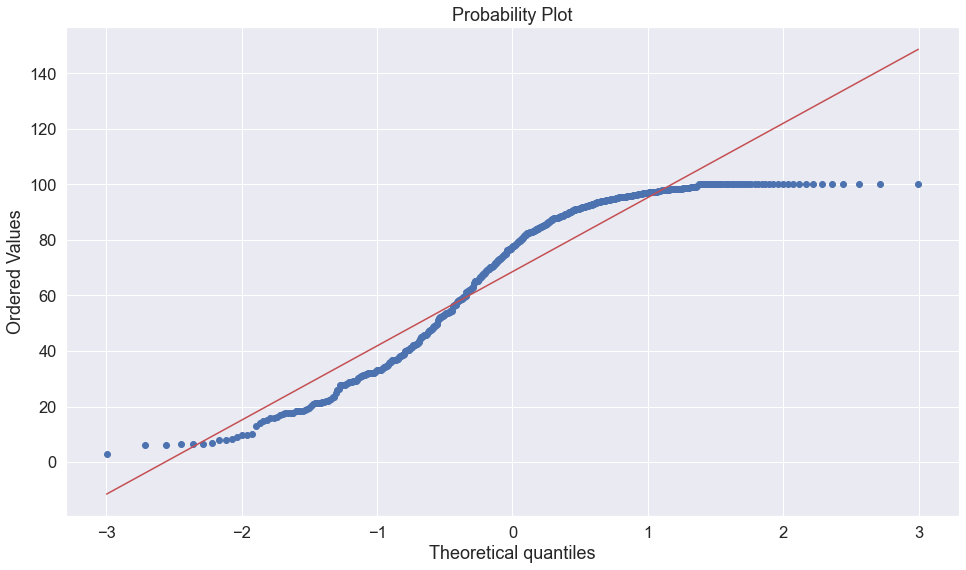

AGE does not look Gaussian (reject H0)


In [104]:
def p_test(p,alpha):
    if p > alpha:
        print("AGE looks Gaussian (fail to reject H0)")
    else:
        print("AGE does not look Gaussian (reject H0)")

stats.probplot(df['AGE'],dist='norm',plot=plt)
plt.show()
#using shapiro test for normal
stat, p = stats.shapiro(df['AGE'])
p_test(p,0.5)


### Cross ploting LSTAT - CRIM


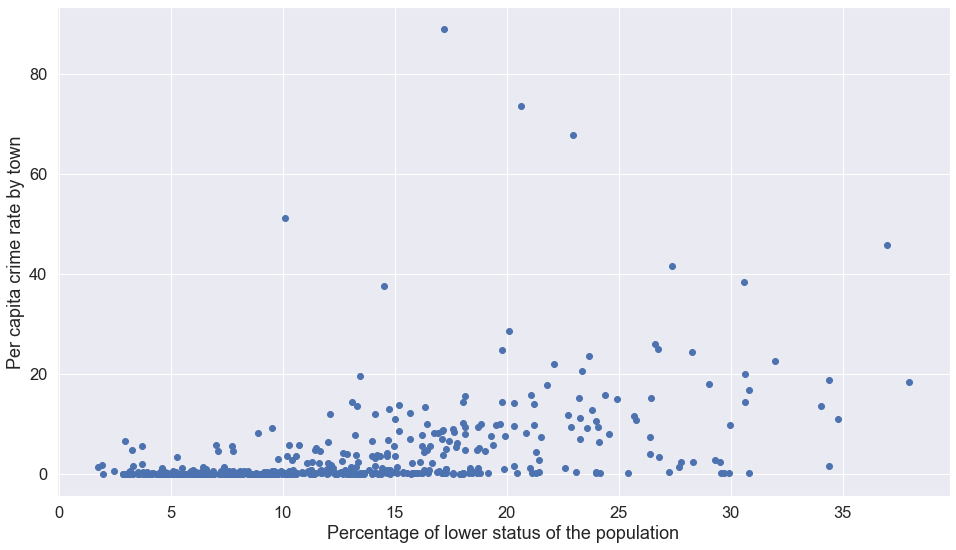

In [105]:
plt.scatter(df['LSTAT'],df['CRIM'])
plt.xlabel("Percentage of lower status of the population")
plt.ylabel("Per capita crime rate by town")
plt.show()

### Heat map plot

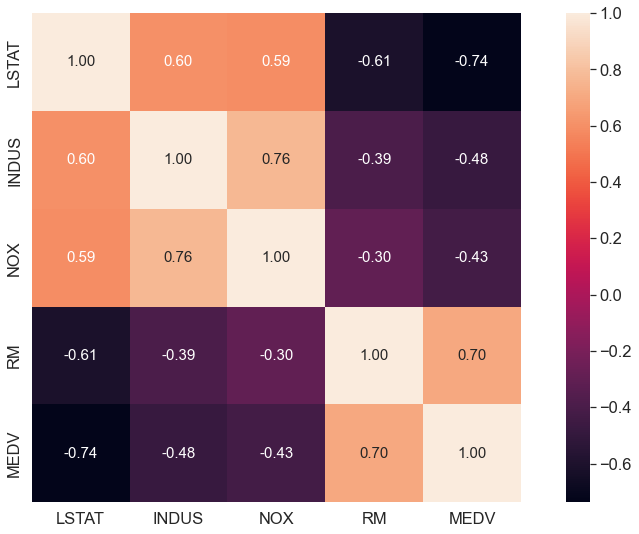

In [106]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

### Create Train test split for the next part
Use random_state = 42. Use 80% of the data for the training set.  Use the same split for all models.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']),df['MEDV'],test_size=0.2, random_state=42)

## Part 2: Linear regression
train and fit LinearRegression model

In [108]:
reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
residuals = y_test- y_pred
# Scoring
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

coef =  reg.coef_
print("Intercept: ", reg.intercept_)
print("MSE :", mse)
print("R-Squared :",r2)

Intercept:  30.24675099392408
MSE : 24.29111947497371
R-Squared : 0.6333247469014311


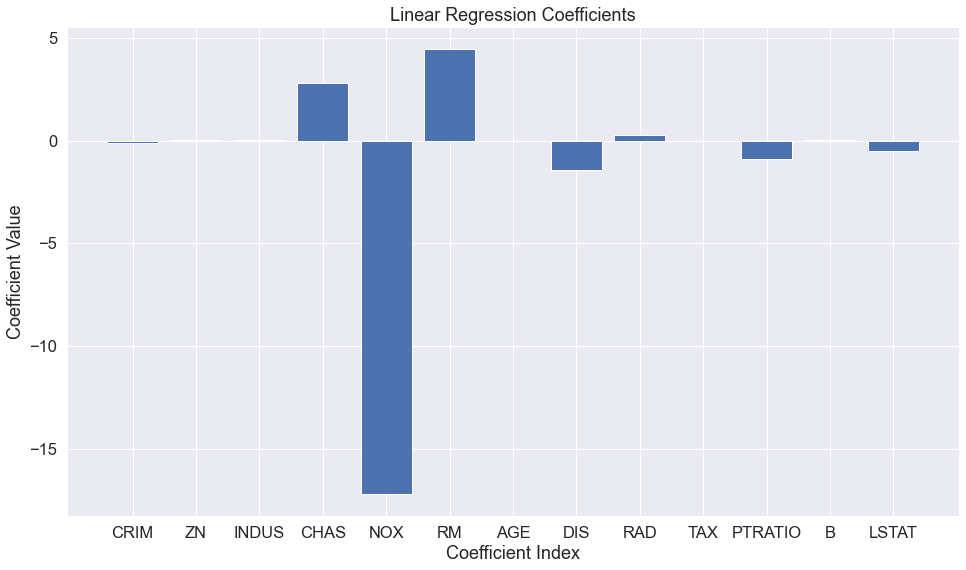

In [109]:
# Plot coef
plt.bar(columns[:-1], coef)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Linear Regression Coefficients")

# Show the plot
plt.show()

### Ploting prediction

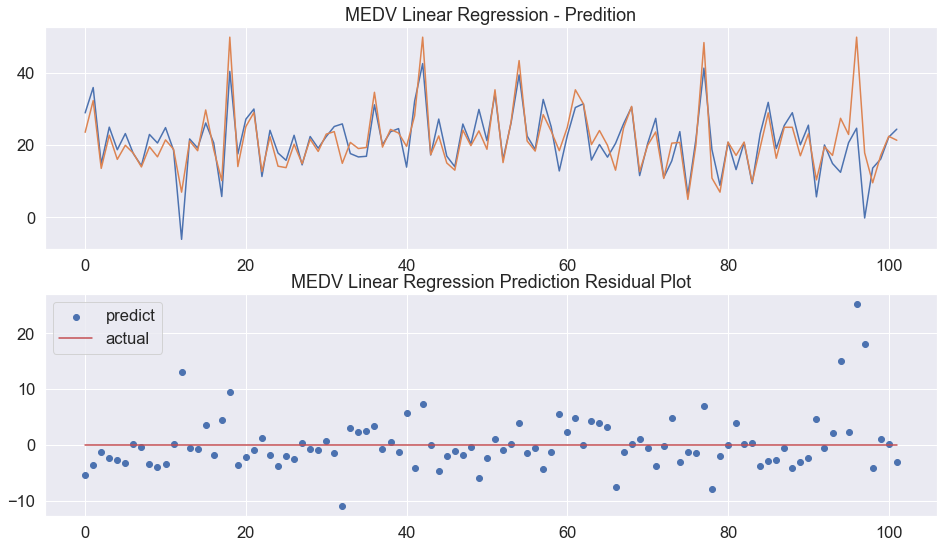

In [110]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(np.arange(0,len(X_test)),y_pred,label = 'predict')
axs[0].plot(np.arange(0,len(X_test)),y_test,label = 'actual')
axs[0].set_title('MEDV Linear Regression - Predition')


axs[1].scatter(np.arange(0,len(X_test)),residuals,label = 'predict')
axs[1].plot(np.zeros_like(y_pred),c='r',label = 'actual')
axs[1].legend()
axs[1].set_title("MEDV Linear Regression Prediction Residual Plot")

plt.legend()
plt.show()

## Part 3.1: Ridge regression
finding best params using Gridsearch

In [111]:
param_grid = {'alpha': [0.1,1,10,100,1000]}

# create ridge model
ridge = Ridge()

# create grid searchcv
grid_search = GridSearchCV(ridge, param_grid, cv=5) # using 5 cross validation

# fit the grid search to data
grid_search.fit(X_train,y_train)

# finding best paramsx
best_params = grid_search.best_params_

# get best estimator
best_est = grid_search.best_estimator_

print("Best params: ",best_params)
print("Best Estimator: ",best_est)

# using best estimator to predict
y_pred = best_est.predict(X_test)
res = y_pred-y_test

mes_ridge = mean_squared_error(y_pred,y_test)
r2_ridge = r2_score(y_pred,y_test)

coef = best_est.coef_
print("Intercept: ", best_est.intercept_)
print("MSE :", mes_ridge)
print("R-Squared :",r2_ridge)

Best params:  {'alpha': 0.1}
Best Estimator:  Ridge(alpha=0.1)
Intercept:  29.366271272576704
MSE : 24.301025500192758
R-Squared : 0.63326467382235


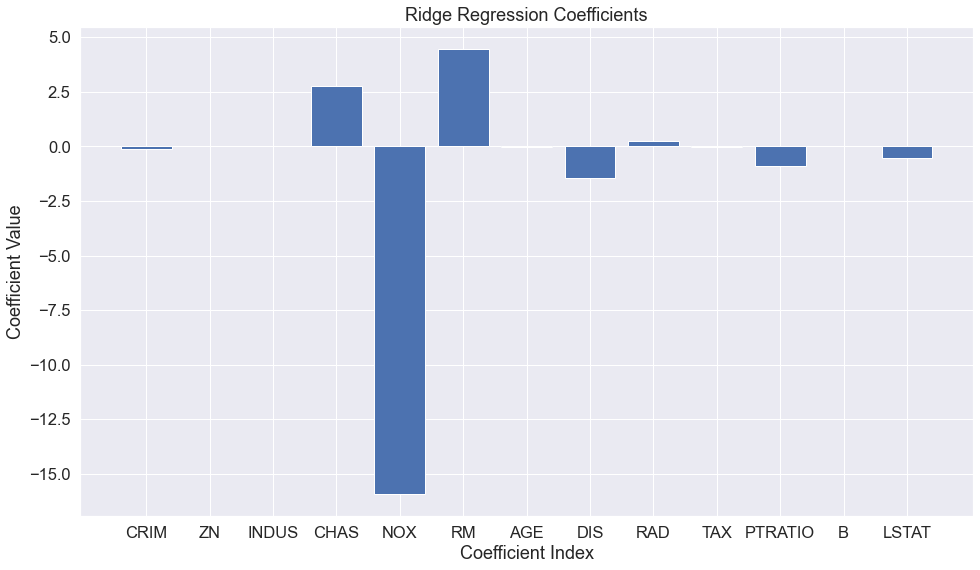

In [112]:
# Plot coef
plt.bar(columns[:-1], coef)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients")

# Show the plot
plt.show()

### Plot Ridge Prediction and Residual using subplot

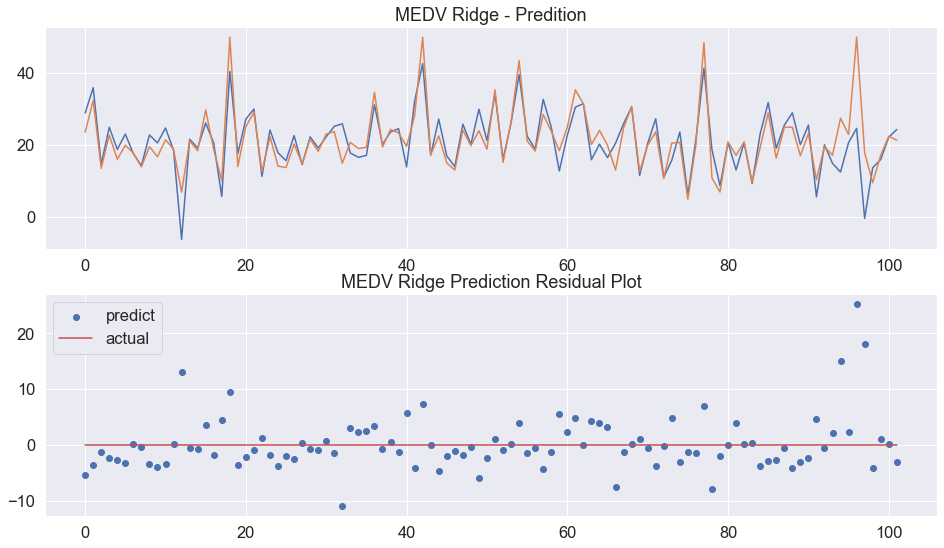

In [113]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(np.arange(0,len(X_test)),y_pred,label = 'predict')
axs[0].plot(np.arange(0,len(X_test)),y_test,label = 'actual')
axs[0].set_title('MEDV Ridge - Predition')


axs[1].scatter(np.arange(0,len(X_test)),residuals,label = 'predict')
axs[1].plot(np.zeros_like(y_pred),c='r',label = 'actual')
axs[1].legend()
axs[1].set_title("MEDV Ridge Prediction Residual Plot")

plt.legend()
plt.show()

## Part 3.2: LASSO regression
using gird search to find best lasso model

In [114]:
param_grid = {'alpha': [0.1,1,10,100,1000]}

# create ridge model
lasso = Lasso()

# create grid searchcv
grid_search = GridSearchCV(lasso, param_grid, cv=5) # using 5 cross validation

# fit the grid search to data
grid_search.fit(X_train,y_train)

# finding best paramsx
best_params = grid_search.best_params_

# get best estimator
best_est = grid_search.best_estimator_

print("Best params: ",best_params)
print("Best Estimator: ",best_est)

# using best estimator to predict
y_pred = best_est.predict(X_test)
res = y_pred-y_test

mes_ridge = mean_squared_error(y_pred,y_test)
r2_ridge = r2_score(y_pred,y_test)

coef = best_est.coef_
print("Intercept: ", best_est.intercept_)
print("MSE :", mes_ridge)
print("R-Squared :",r2_ridge)

Best params:  {'alpha': 0.1}
Best Estimator:  Lasso(alpha=0.1)
Intercept:  19.859769480417444
MSE : 25.155593753934173
R-Squared : 0.6201889701292777


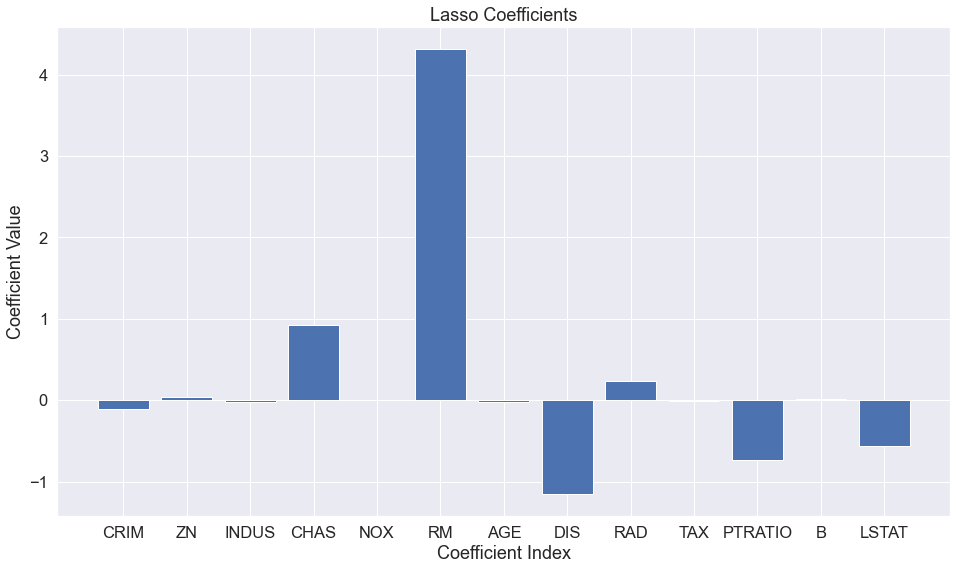

In [115]:
# Plot coef
plt.bar(columns[:-1], coef)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")

# Show the plot
plt.show()

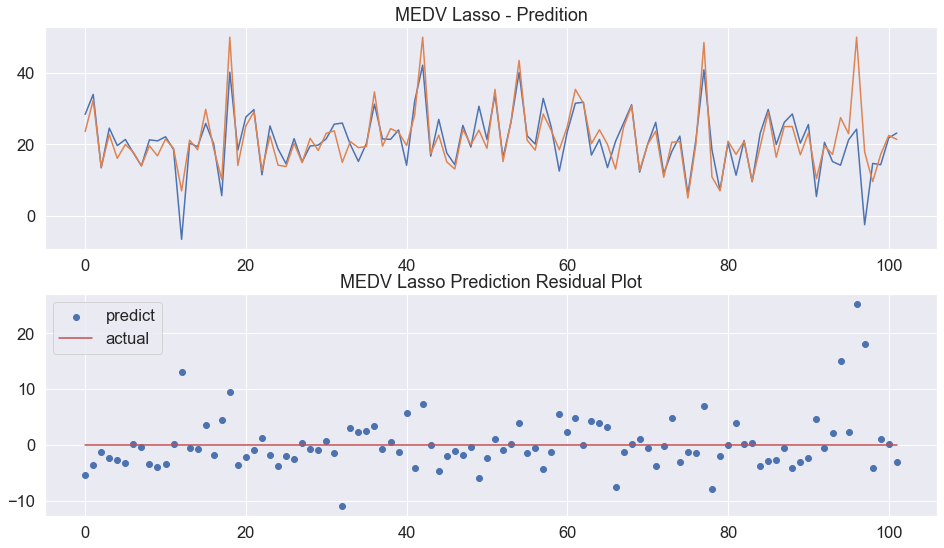

In [116]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(np.arange(0,len(X_test)),y_pred,label = 'predict')
axs[0].plot(np.arange(0,len(X_test)),y_test,label = 'actual')
axs[0].set_title('MEDV Lasso - Predition')


axs[1].scatter(np.arange(0,len(X_test)),residuals,label = 'predict')
axs[1].plot(np.zeros_like(y_pred),c='r',label = 'actual')
axs[1].legend()
axs[1].set_title("MEDV Lasso Prediction Residual Plot")

plt.legend()
plt.show()

## Part 4: Conclusions
From the results of the linear regression models, it is evident that Ridge and Lasso have different regularization effects on the model coefficients. By analyzing the coefficients plot, we can observe the impact of the regularization on the feature "NOX". In the plain linear regression (LR) model, there is a substantial negative coefficient for the "NOX" feature, while in the Ridge model, the coefficient value is smaller, and in the Lasso model, the coefficient is effectively zero. This reduction in the magnitude of the "NOX" coefficient in Ridge and Lasso models helps to reduce the model's dependence on a single feature, reducing the risk of overfitting. However, this comes at a cost of reduced accuracy, with a slight decrease in accuracy in the Ridge model and a significant drop in accuracy in the Lasso model.

## Part 5: Appendix

In [117]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Saranpat Prasertthum
My NetID is: 655667271
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
